# Exploration

In this notebook, we will explore our tables and merge them to make meaningful rows of data for our project.

## Imports

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the tables

In the previous notebook, we 'pickled' our dataframe objects to files in this directory. We will now read them so we can use the dataframes in this notebook

In [2]:
user_profile = pd.read_pickle('user_profile')
user_cuisine = pd.read_pickle('user_cuisine')
restaurant_profile = pd.read_pickle('restaurant_profile')
restaurant_cuisine = pd.read_pickle('restaurant_cuisine')
ratings = pd.read_pickle('ratings')

## Explore the data

### Consumer data
Let's first explore the tables with consumer data: user_profile and user_cuisine

In [3]:
user_profile.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,False,abstemious,informal,family,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,False,abstemious,informal,family,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,False,social drinker,formal,family,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,False,abstemious,informal,family,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,False,abstemious,no preference,family,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [4]:
user_cuisine.head()

,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch


Both of these tables are related by the userID key. user_profile has one row per userID, while user_cuisine can have multiple rows per userID. This means that a user can have multiple cuisine preferences. We must merge these tables together so that each row includes all the cuisines preferred by the user. We can do this by using pandas.get_dummies to one-hot encode the categorical values that represent preferred cuisines.

Merging the user_profile and user_cuisine tables gives us multiple rows per userID for every cuisine that is preferred by that user.

In [5]:
user_profile_cuisine = pd.merge(user_profile, user_cuisine, how='inner', on='userID')
user_profile_cuisine.Rcuisine = user_profile_cuisine.Rcuisine.astype('category')
user_profile_cuisine.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,Rcuisine
0,U1001,22.139997,-100.978803,False,abstemious,informal,family,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,American
1,U1002,22.150087,-100.983325,False,abstemious,informal,family,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87,Mexican
2,U1003,22.119847,-100.946527,False,social drinker,formal,family,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69,Mexican
3,U1004,18.867000,-99.183000,False,abstemious,informal,family,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,Bakery
4,U1004,18.867000,-99.183000,False,abstemious,informal,family,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,Breakfast-Brunch


We can collapse these duplicate rows into single rows per userID that show all preferred cuisines for a user.

In [6]:
u_cuisines = pd.get_dummies(user_profile_cuisine.Rcuisine, prefix='u')
user_ID = user_profile_cuisine[['userID']]
user_ID_cuisines = pd.concat([user_ID, u_cuisines], axis=1)
u_cuisines_collapsed = user_ID_cuisines.groupby(user_ID_cuisines.userID, as_index=False).sum()
u_cuisines_collapsed.head()

,userID,u_Afghan,u_African,u_American,u_Armenian,u_Asian,u_Australian,u_Austrian,u_Bagels,u_Bakery,...,u_Swiss,u_Tapas,u_Tea_House,u_Tex-Mex,u_Thai,u_Tibetan,u_Tunisian,u_Turkish,u_Vegetarian,u_Vietnamese
0,U1001,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,U1002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,U1003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,U1004,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,U1005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
user_profile_cuisine = pd.merge(user_profile, u_cuisines_collapsed, how='inner', on='userID')
user_profile_cuisine.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,marital_status,hijos,birth_year,...,u_Swiss,u_Tapas,u_Tea_House,u_Tex-Mex,u_Thai,u_Tibetan,u_Tunisian,u_Turkish,u_Vegetarian,u_Vietnamese
0,U1001,22.139997,-100.978803,False,abstemious,informal,family,single,independent,1989,...,0,0,0,0,0,0,0,0,0,0
1,U1002,22.150087,-100.983325,False,abstemious,informal,family,single,independent,1990,...,0,0,0,0,0,0,0,0,0,0
2,U1003,22.119847,-100.946527,False,social drinker,formal,family,single,independent,1989,...,0,0,0,0,0,0,0,0,0,0
3,U1004,18.867000,-99.183000,False,abstemious,informal,family,single,independent,1940,...,0,0,0,0,0,0,0,0,0,0
4,U1005,22.183477,-100.959891,False,abstemious,no preference,family,single,independent,1992,...,0,0,0,0,0,0,0,0,0,0


We now have our table user_profile_cuisine where each row shows each individual user profile along with the one-hot encoded categorical values that represent cuisines preferred by the user

### Restaurant data

Let's explore the tables with restaurant data: restaurant_profile and restaurant_cuisine

In [8]:
restaurant_profile.head()

,placeID,latitude,longitude,name,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,Kiku Cuernavaca,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,False,closed,none
1,132825,22.147392,-100.983092,puesto de tacos,No_Alcohol_Served,none,informal,completely,low,familiar,False,open,none
2,135106,22.149709,-100.976093,El Rincón de San Francisco,Wine-Beer,only at bar,informal,partially,medium,familiar,False,open,none
3,132667,23.752697,-99.163359,little pizza Emilio Portes Gil,No_Alcohol_Served,none,informal,completely,low,familiar,True,closed,none
4,132613,23.752903,-99.165076,carnitas_mata,No_Alcohol_Served,permitted,informal,completely,medium,familiar,True,closed,none


In [9]:
restaurant_cuisine.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


These tables are very similar to the consumer tables as the restaurant_profile table shows one row per restaurant (placeID) and the restaurant_cuisine table can have multiple rows per placeID to show that a restaurant is associated with multiple types of cuisines. We must perform the same operations on these tables as we did with the consumer tables so that only one row in a table will show everything we need to know about a restaurant

In [10]:
restaurant_profile_cuisine = pd.merge(restaurant_profile, restaurant_cuisine, how='inner', on='placeID')
restaurant_profile_cuisine.Rcuisine = restaurant_profile_cuisine.Rcuisine.astype('category')
restaurant_profile_cuisine.head()

,placeID,latitude,longitude,name,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,Rcuisine
0,134999,18.915421,-99.184871,Kiku Cuernavaca,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,False,closed,none,Japanese
1,132825,22.147392,-100.983092,puesto de tacos,No_Alcohol_Served,none,informal,completely,low,familiar,False,open,none,Mexican
2,135106,22.149709,-100.976093,El Rincón de San Francisco,Wine-Beer,only at bar,informal,partially,medium,familiar,False,open,none,Mexican
3,132667,23.752697,-99.163359,little pizza Emilio Portes Gil,No_Alcohol_Served,none,informal,completely,low,familiar,True,closed,none,Armenian
4,132613,23.752903,-99.165076,carnitas_mata,No_Alcohol_Served,permitted,informal,completely,medium,familiar,True,closed,none,Mexican


In [11]:
r_cuisines = pd.get_dummies(restaurant_profile_cuisine.Rcuisine, prefix='r')
restaurant_ID = restaurant_profile_cuisine[['placeID']]
restaurant_ID_cuisines = pd.concat([restaurant_ID, r_cuisines], axis=1)
r_cuisines_collapsed = restaurant_ID_cuisines.groupby(restaurant_ID_cuisines.placeID, as_index=False).sum()
r_cuisines_collapsed.head()

,placeID,r_American,r_Armenian,r_Bakery,r_Bar,r_Bar_Pub_Brewery,r_Breakfast-Brunch,r_Burgers,r_Cafe-Coffee_Shop,r_Cafeteria,...,r_Game,r_International,r_Italian,r_Japanese,r_Mediterranean,r_Mexican,r_Pizzeria,r_Regional,r_Seafood,r_Vietnamese
0,132560,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,132572,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,132583,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,132584,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,132594,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
restaurant_profile_cuisine = pd.merge(restaurant_profile, r_cuisines_collapsed, how='inner', on='placeID')
restaurant_profile_cuisine.head()

,placeID,latitude,longitude,name,alcohol,smoking_area,dress_code,accessibility,price,Rambience,...,r_Game,r_International,r_Italian,r_Japanese,r_Mediterranean,r_Mexican,r_Pizzeria,r_Regional,r_Seafood,r_Vietnamese
0,134999,18.915421,-99.184871,Kiku Cuernavaca,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,...,0,0,0,1,0,0,0,0,0,0
1,132825,22.147392,-100.983092,puesto de tacos,No_Alcohol_Served,none,informal,completely,low,familiar,...,0,0,0,0,0,1,0,0,0,0
2,135106,22.149709,-100.976093,El Rincón de San Francisco,Wine-Beer,only at bar,informal,partially,medium,familiar,...,0,0,0,0,0,1,0,0,0,0
3,132667,23.752697,-99.163359,little pizza Emilio Portes Gil,No_Alcohol_Served,none,informal,completely,low,familiar,...,0,0,0,0,0,0,0,0,0,0
4,132613,23.752903,-99.165076,carnitas_mata,No_Alcohol_Served,permitted,informal,completely,medium,familiar,...,0,0,0,0,0,1,0,0,0,0


### Ratings data

The ratings table shows user ratings of restaurants. Ratings are numerical values between 0 and 2 inclusive, 0 being the worst and 2 being the best.

In [13]:
ratings.head()

,userID,placeID,rating
0,U1077,135085,2
1,U1077,135038,2
2,U1077,132825,2
3,U1077,135060,1
4,U1068,135104,1


Here is a visualization of how many ratings were collected from consumers on various restaurants

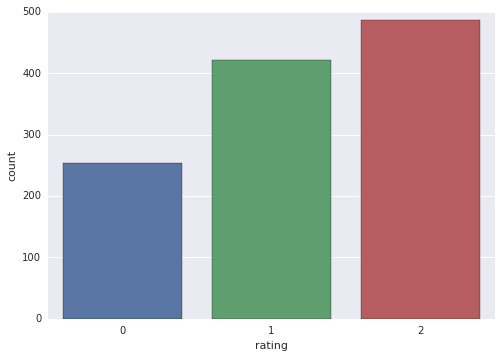

In [14]:
sns.countplot(ratings['rating'])

We wil now merge our final restaurant and consumer tables together using the keys in the ratings table

In [15]:
user_ratings = pd.merge(user_profile_cuisine, ratings, how='inner', on='userID')
user_restaurant_ratings = pd.merge(user_ratings, restaurant_profile_cuisine, how='inner', on='placeID')
user_restaurant_ratings.head()

,userID,latitude_x,longitude_x,smoker,drink_level,dress_preference,ambience,marital_status,hijos,birth_year,...,r_Game,r_International,r_Italian,r_Japanese,r_Mediterranean,r_Mexican,r_Pizzeria,r_Regional,r_Seafood,r_Vietnamese
0,U1001,22.139997,-100.978803,False,abstemious,informal,family,single,independent,1989,...,0,0,0,0,0,1,0,0,0,0
1,U1002,22.150087,-100.983325,False,abstemious,informal,family,single,independent,1990,...,0,0,0,0,0,1,0,0,0,0
2,U1003,22.119847,-100.946527,False,social drinker,formal,family,single,independent,1989,...,0,0,0,0,0,1,0,0,0,0
3,U1006,22.150000,-100.983000,True,social drinker,no preference,friends,single,independent,1989,...,0,0,0,0,0,1,0,0,0,0
4,U1009,22.159427,-100.990448,False,abstemious,formal,family,single,kids,1991,...,0,0,0,0,0,1,0,0,0,0


Lastly, make sure all categorical values are represented correctly in the user_restaurant_ratings table

In [16]:
categorical_cols = ['drink_level', 'dress_preference', 'ambience', 'marital_status', 'hijos', 'interest',
                    'personality', 'religion', 'activity', 'color', 'budget', 'alcohol', 'smoking_area',
                    'dress_code', 'accessibility', 'price', 'Rambience', 'area', 'other_services']

for col in categorical_cols:
    user_restaurant_ratings[col] = user_restaurant_ratings[col].astype('category')

In [17]:
user_restaurant_ratings.head()

,userID,latitude_x,longitude_x,smoker,drink_level,dress_preference,ambience,marital_status,hijos,birth_year,...,r_Game,r_International,r_Italian,r_Japanese,r_Mediterranean,r_Mexican,r_Pizzeria,r_Regional,r_Seafood,r_Vietnamese
0,U1001,22.139997,-100.978803,False,abstemious,informal,family,single,independent,1989,...,0,0,0,0,0,1,0,0,0,0
1,U1002,22.150087,-100.983325,False,abstemious,informal,family,single,independent,1990,...,0,0,0,0,0,1,0,0,0,0
2,U1003,22.119847,-100.946527,False,social drinker,formal,family,single,independent,1989,...,0,0,0,0,0,1,0,0,0,0
3,U1006,22.150000,-100.983000,True,social drinker,no preference,friends,single,independent,1989,...,0,0,0,0,0,1,0,0,0,0
4,U1009,22.159427,-100.990448,False,abstemious,formal,family,single,kids,1991,...,0,0,0,0,0,1,0,0,0,0


## Write the data

Pickle the user_restaurant_ratings dataframe for use in the next notebook using pandas.dataframe.to_pickle

In [18]:
user_restaurant_ratings.to_pickle('user_restaurant_ratings_exploration')